In [1]:
# data preprocessing
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

# 글꼴
plt.rc('font', family='NanumGothic')

# ignore warining
import warnings
warnings.filterwarnings('ignore')

#modeling
from sklearn.preprocessing import LabelEncoder

#Time Indexing
from datetime import datetime


In [2]:
card= pd.read_csv('C:/jupyter_project/CORONA/card.csv',dtype={'CODE':np.str})

## 카드 데이터 변수

1. receipt_dttm: 카드회사가 카드사용내역을 접수한일자

2. adstrd_code: 가맹점 위치 기준 행정동 코드

3. adstrd_nm: 가맹점 위치 기준 행정동명

4. mrhst_induty_cl_code: 가맹점 업종코드

5. mrhst_induty_cl_nm: 가맹점 업종명

6. selng_cascnt: 매출발생건수

7. salamt: 매출발생금액

In [3]:
card.shape

(3777647, 7)

In [4]:
card.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,1174066000,성내3동,7041,약국,463,5843230
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550
2,20200104,1174066000,성내3동,7021,한의원,53,4589800
3,20200104,1174066000,성내3동,7020,의원,339,9267240
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000


## 행정동 데이터 불러오기

In [5]:
local= pd.read_csv('C:/jupyter_project/CORONA/adstrd_master.csv',dtype={'CODE':np.str})

In [6]:
local.shape

(3493, 4)

In [7]:
# 매툴발생건수와 매출발생금약 숫자형 변수로 변환

card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3777647 entries, 0 to 3777646
Data columns (total 7 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   receipt_dttm          int64 
 1   adstrd_code           int64 
 2   adstrd_nm             object
 3   mrhst_induty_cl_code  int64 
 4   mrhst_induty_cl_nm    object
 5   selng_cascnt          object
 6   salamt                object
dtypes: int64(3), object(4)
memory usage: 201.7+ MB


## card 데이터와 local 데이터 합치기

In [8]:
# card와 동일한 행정id 변수로 합치기

local.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   adstrd_code  3493 non-null   float64
 1   adstrd_nm    3493 non-null   object 
 2   brtc_nm      3493 non-null   object 
 3   signgu_nm    3474 non-null   object 
dtypes: float64(1), object(3)
memory usage: 109.3+ KB


In [9]:
local['adstrd_code'] = local['adstrd_code'].astype(int)

In [10]:
local.head()

,adstrd_code,adstrd_nm,brtc_nm,signgu_nm
0,11110515,청운효자동,서울특별시,종로구
1,11110530,사직동,서울특별시,종로구
2,11110540,삼청동,서울특별시,종로구
3,11110550,부암동,서울특별시,종로구
4,11110560,평창동,서울특별시,종로구


In [11]:
card['adstrd_code'] = card['adstrd_code']/100

In [12]:
card['adstrd_code'] = card['adstrd_code'].astype(int)

In [13]:
card.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,11740660,성내3동,7041,약국,463,5843230
1,20200104,11740660,성내3동,7022,치과의원,33,7835550
2,20200104,11740660,성내3동,7021,한의원,53,4589800
3,20200104,11740660,성내3동,7020,의원,339,9267240
4,20200104,11740660,성내3동,6110,자동차정비,19,4441000


In [14]:
card=pd.merge(card, local, on='adstrd_code')

In [15]:
card.head()

,receipt_dttm,adstrd_code,adstrd_nm_x,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,adstrd_nm_y,brtc_nm,signgu_nm
0,20200104,11740660,성내3동,7041,약국,463,5843230,성내3동,서울특별시,강동구
1,20200104,11740660,성내3동,7022,치과의원,33,7835550,성내3동,서울특별시,강동구
2,20200104,11740660,성내3동,7021,한의원,53,4589800,성내3동,서울특별시,강동구
3,20200104,11740660,성내3동,7020,의원,339,9267240,성내3동,서울특별시,강동구
4,20200104,11740660,성내3동,6110,자동차정비,19,4441000,성내3동,서울특별시,강동구


In [16]:
card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3777647 entries, 0 to 3777646
Data columns (total 10 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   receipt_dttm          int64 
 1   adstrd_code           int32 
 2   adstrd_nm_x           object
 3   mrhst_induty_cl_code  int64 
 4   mrhst_induty_cl_nm    object
 5   selng_cascnt          object
 6   salamt                object
 7   adstrd_nm_y           object
 8   brtc_nm               object
 9   signgu_nm             object
dtypes: int32(1), int64(2), object(7)
memory usage: 302.6+ MB


In [17]:
#adstrd_nm_x와 y 데이터 2개 있으니 한 개 버림

card = card.drop('adstrd_nm_x',axis=1)

### 결측치 확인

In [18]:
total = card.isnull().sum()
percent = (card.isnull().sum() / card.isnull().count()*100)

In [19]:
# 결측치 존재하지 않음

pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).sort_values(by='Percent', ascending=False).head(30)

,Total,Percent
receipt_dttm,0,0.0
adstrd_code,0,0.0
mrhst_induty_cl_code,0,0.0
mrhst_induty_cl_nm,0,0.0
selng_cascnt,0,0.0
salamt,0,0.0
adstrd_nm_y,0,0.0
brtc_nm,0,0.0
signgu_nm,0,0.0


## datetime 형식으로 바꾸기

In [20]:
card['receipt_dttm'] = card['receipt_dttm'].astype(str)
card['receipt_dttm'] = pd.to_datetime(card['receipt_dttm'])
card['receipt_dttm'] = card['receipt_dttm'].dt.tz_localize('UTC')
print(card['receipt_dttm'])

0         2020-01-04 00:00:00+00:00
1         2020-01-04 00:00:00+00:00
2         2020-01-04 00:00:00+00:00
3         2020-01-04 00:00:00+00:00
4         2020-01-04 00:00:00+00:00
                     ...           
3777642   2020-06-14 00:00:00+00:00
3777643   2020-06-14 00:00:00+00:00
3777644   2020-06-14 00:00:00+00:00
3777645   2020-06-14 00:00:00+00:00
3777646   2020-06-14 00:00:00+00:00
Name: receipt_dttm, Length: 3777647, dtype: datetime64[ns, UTC]


In [21]:
card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3777647 entries, 0 to 3777646
Data columns (total 9 columns):
 #   Column                Dtype              
---  ------                -----              
 0   receipt_dttm          datetime64[ns, UTC]
 1   adstrd_code           int32              
 2   mrhst_induty_cl_code  int64              
 3   mrhst_induty_cl_nm    object             
 4   selng_cascnt          object             
 5   salamt                object             
 6   adstrd_nm_y           object             
 7   brtc_nm               object             
 8   signgu_nm             object             
dtypes: datetime64[ns, UTC](1), int32(1), int64(1), object(6)
memory usage: 273.8+ MB


In [22]:
import calendar 

In [23]:
card["year"] = card['receipt_dttm'].dt.year
card["month"] = card['receipt_dttm'].dt.month
card["day"] = card['receipt_dttm'].dt.day
card["weekday"] = card['receipt_dttm'].dt.weekday

In [24]:
card['weekday']= card.weekday.astype('category')

In [25]:
print(card['weekday'].cat.categories)

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')


In [26]:
# 요일 이해하기 쉽게 범주화

card.weekday.cat.categories = ['1','2','3','4','5','6','7']

In [27]:
card.head()

,receipt_dttm,adstrd_code,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,adstrd_nm_y,brtc_nm,signgu_nm,year,month,day,weekday
0,2020-01-04 00:00:00+00:00,11740660,7041,약국,463,5843230,성내3동,서울특별시,강동구,2020,1,4,6
1,2020-01-04 00:00:00+00:00,11740660,7022,치과의원,33,7835550,성내3동,서울특별시,강동구,2020,1,4,6
2,2020-01-04 00:00:00+00:00,11740660,7021,한의원,53,4589800,성내3동,서울특별시,강동구,2020,1,4,6
3,2020-01-04 00:00:00+00:00,11740660,7020,의원,339,9267240,성내3동,서울특별시,강동구,2020,1,4,6
4,2020-01-04 00:00:00+00:00,11740660,6110,자동차정비,19,4441000,성내3동,서울특별시,강동구,2020,1,4,6


In [28]:
card.shape

(3777647, 13)

In [29]:
print('year', card['year'].unique())
print('month', card['month'].unique())
print('day', card['day'].unique())
print('weekday', card['weekday'].unique())

year [2020]
month [1 2 3 4 5 6]
day [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31  1  2  3]
weekday [6, 7, 1, 2, 3, 4, 5]
Categories (7, object): [6, 7, 1, 2, 3, 4, 5]


## 문자열 변수, 숫자형으로 변환

In [30]:
# selng_cascnt: 매출발생건수
# salamt: 매출발생금액

card=card.sort_values(by=['receipt_dttm'])

In [31]:
card.head()

,receipt_dttm,adstrd_code,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,adstrd_nm_y,brtc_nm,signgu_nm,year,month,day,weekday
0,2020-01-04 00:00:00+00:00,11740660,7041,약국,463,5843230,성내3동,서울특별시,강동구,2020,1,4,6
2487467,2020-01-04 00:00:00+00:00,11320681,8001,일반한식,136,2253800,쌍문4동,서울특별시,도봉구,2020,1,4,6
2487468,2020-01-04 00:00:00+00:00,11320681,7102,미 용 원,13,236500,쌍문4동,서울특별시,도봉구,2020,1,4,6
2487469,2020-01-04 00:00:00+00:00,11320681,7041,약국,101,1373570,쌍문4동,서울특별시,도봉구,2020,1,4,6
2487470,2020-01-04 00:00:00+00:00,11320681,7020,의원,51,889870,쌍문4동,서울특별시,도봉구,2020,1,4,6


In [32]:
card['selng_cascnt'].unique()

array(['463', '136', '13', ..., '22610', '196627', '16118'], dtype=object)

In [33]:
card['selng_cascnt'] = pd.Series(card['selng_cascnt'], dtype='int64')

In [34]:
card['selng_cascnt'].unique()

array(['463', '136', '13', ..., '22610', '196627', '16118'], dtype=object)

In [35]:
card['selng_cascnt'].value_counts()

1         641598
2         353740
3         236479
4         173452
5         135476
           ...  
6314           1
59774          1
232523         1
47421          1
285055         1
Name: selng_cascnt, Length: 12150, dtype: int64

In [36]:
card.head()

,receipt_dttm,adstrd_code,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,adstrd_nm_y,brtc_nm,signgu_nm,year,month,day,weekday
0,2020-01-04 00:00:00+00:00,11740660,7041,약국,463,5843230,성내3동,서울특별시,강동구,2020,1,4,6
2487467,2020-01-04 00:00:00+00:00,11320681,8001,일반한식,136,2253800,쌍문4동,서울특별시,도봉구,2020,1,4,6
2487468,2020-01-04 00:00:00+00:00,11320681,7102,미 용 원,13,236500,쌍문4동,서울특별시,도봉구,2020,1,4,6
2487469,2020-01-04 00:00:00+00:00,11320681,7041,약국,101,1373570,쌍문4동,서울특별시,도봉구,2020,1,4,6
2487470,2020-01-04 00:00:00+00:00,11320681,7020,의원,51,889870,쌍문4동,서울특별시,도봉구,2020,1,4,6


In [37]:
total = card.isnull().sum()
percent = (card.isnull().sum() / card.isnull().count()*100)

In [38]:
# 결측치가 없음

pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).sort_values(by='Percent', ascending=False).head(30)

,Total,Percent
receipt_dttm,0,0.0
adstrd_code,0,0.0
mrhst_induty_cl_code,0,0.0
mrhst_induty_cl_nm,0,0.0
selng_cascnt,0,0.0
salamt,0,0.0
adstrd_nm_y,0,0.0
brtc_nm,0,0.0
signgu_nm,0,0.0
year,0,0.0


In [39]:
card = card[(card.selng_cascnt.str.contains(r"\d", regex = True))]

In [40]:
card['salamt'] = pd.Series(card['salamt'], dtype='int64')

In [41]:
card['selng_cascnt'] = pd.Series(card['selng_cascnt'], dtype='int64')

In [42]:
display(card)

,receipt_dttm,adstrd_code,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,adstrd_nm_y,brtc_nm,signgu_nm,year,month,day,weekday
0,2020-01-04 00:00:00+00:00,11740660,7041,약국,463,5843230,성내3동,서울특별시,강동구,2020,1,4,6
2487467,2020-01-04 00:00:00+00:00,11320681,8001,일반한식,136,2253800,쌍문4동,서울특별시,도봉구,2020,1,4,6
2487468,2020-01-04 00:00:00+00:00,11320681,7102,미 용 원,13,236500,쌍문4동,서울특별시,도봉구,2020,1,4,6
2487469,2020-01-04 00:00:00+00:00,11320681,7041,약국,101,1373570,쌍문4동,서울특별시,도봉구,2020,1,4,6
2487470,2020-01-04 00:00:00+00:00,11320681,7020,의원,51,889870,쌍문4동,서울특별시,도봉구,2020,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3381374,2020-06-14 00:00:00+00:00,11170660,8301,제과점,124,1027500,이태원2동,서울특별시,용산구,2020,6,14,7
3381375,2020-06-14 00:00:00+00:00,11170660,6140,주 차 장,33,107500,이태원2동,서울특별시,용산구,2020,6,14,7
3381376,2020-06-14 00:00:00+00:00,11170660,4210,맞춤복 점,1,35000,이태원2동,서울특별시,용산구,2020,6,14,7
3381366,2020-06-14 00:00:00+00:00,11170660,9210,세탁소,3,46000,이태원2동,서울특별시,용산구,2020,6,14,7


In [43]:
total = card.isnull().sum()
percent = (card.isnull().sum() / card.isnull().count()*100)

In [44]:
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).sort_values(by='Percent', ascending=False).head(30)

,Total,Percent
receipt_dttm,0,0.0
adstrd_code,0,0.0
mrhst_induty_cl_code,0,0.0
mrhst_induty_cl_nm,0,0.0
selng_cascnt,0,0.0
salamt,0,0.0
adstrd_nm_y,0,0.0
brtc_nm,0,0.0
signgu_nm,0,0.0
year,0,0.0


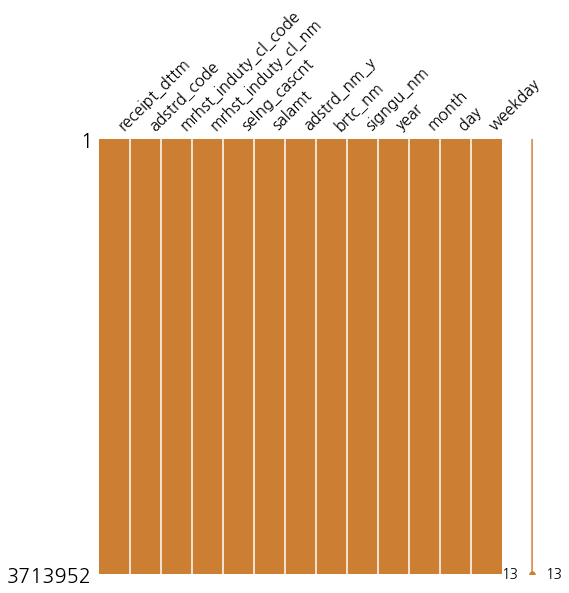

In [45]:
import missingno as msno
msno.matrix(df=card.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

## 시각화

## 1. 카드 사용량 확인

In [46]:
# 카드사용 데이터에는 6월 중반까지의 데이터가 있으므로 5월까지의 데이터를 활용
# normalize=False, (False면 개수, True면 상대 비율 구함)

u = card[card['month'] != 6]['month'].value_counts(normalize=True) * 100
u = u.reset_index()
u.columns = ['month', 'use_perc']

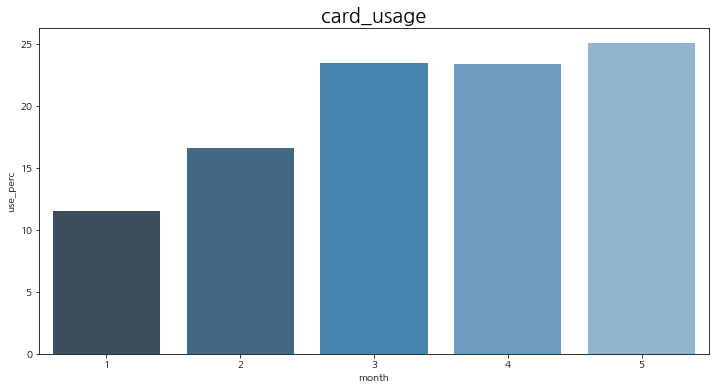

In [47]:
# 카드 사용량이 증가하고 있다. 

plt.figure(figsize = (12, 6))
plt.title('card_usage', fontsize = 20)
ax = sns.barplot(data = u, x = 'month', y = 'use_perc', palette = 'Blues_d')
plt.show()

In [48]:
card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3713952 entries, 0 to 3777646
Data columns (total 13 columns):
 #   Column                Dtype              
---  ------                -----              
 0   receipt_dttm          datetime64[ns, UTC]
 1   adstrd_code           int32              
 2   mrhst_induty_cl_code  int64              
 3   mrhst_induty_cl_nm    object             
 4   selng_cascnt          int64              
 5   salamt                int64              
 6   adstrd_nm_y           object             
 7   brtc_nm               object             
 8   signgu_nm             object             
 9   year                  int64              
 10  month                 int64              
 11  day                   int64              
 12  weekday               category           
dtypes: category(1), datetime64[ns, UTC](1), int32(1), int64(6), object(4)
memory usage: 357.7+ MB


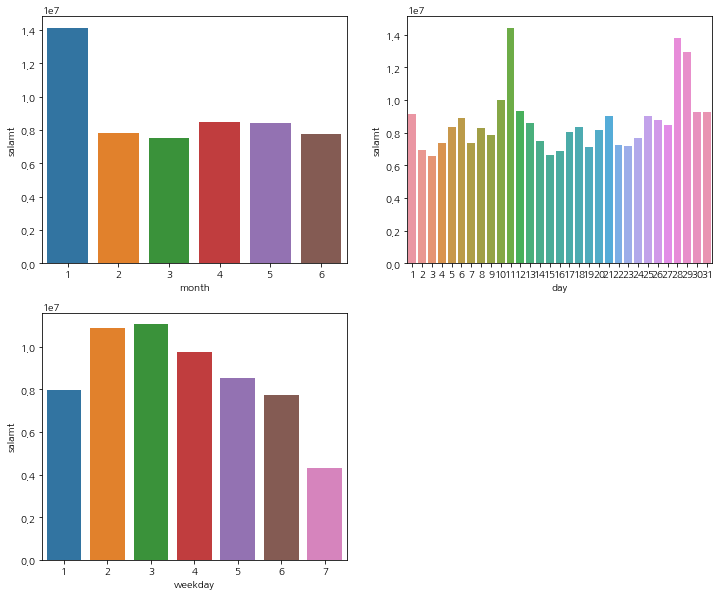

In [49]:
#month와 카드금액
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='month',y='salamt',data=card.groupby('month')['salamt'].mean().reset_index())

#일별와 카드금액
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='day',y='salamt',data=card.groupby('day')['salamt'].mean().reset_index())

#휴일별와 카드금액
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='weekday',y='salamt',data=card.groupby('weekday')['salamt'].mean().reset_index())


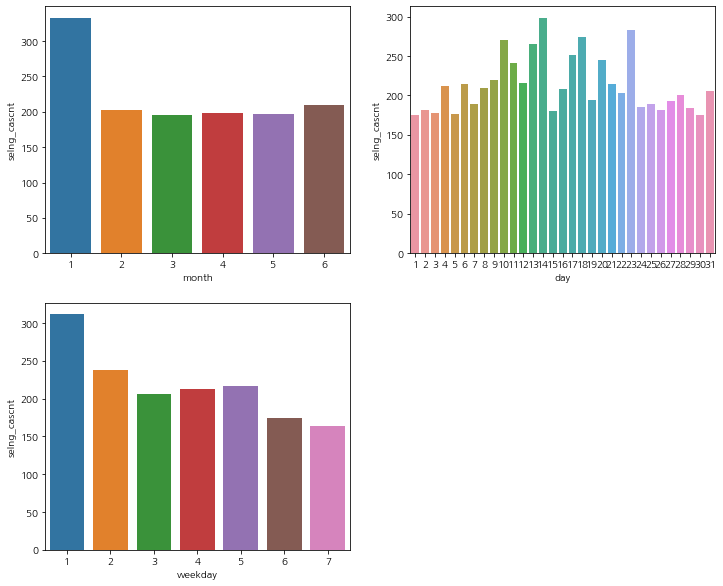

In [50]:
#month와 카드사용빈도
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='month',y='selng_cascnt',data=card.groupby('month')['selng_cascnt'].mean().reset_index())

#일별와 카드사용빈도
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='day',y='selng_cascnt',data=card.groupby('day')['selng_cascnt'].mean().reset_index())

#휴일별와 카드사용빈도
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='weekday',y='selng_cascnt',data=card.groupby('weekday')['selng_cascnt'].mean().reset_index())


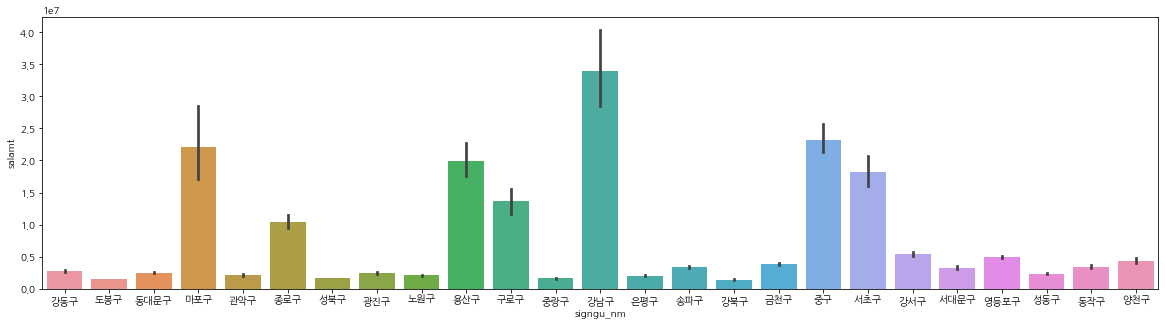

In [51]:
plt.figure(figsize=(20,5))
sns.barplot(data=card,x="signgu_nm",y="salamt")

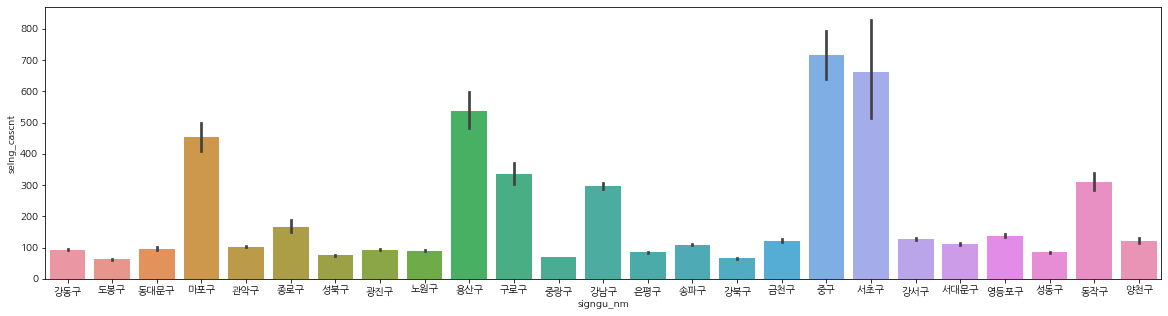

In [52]:
plt.figure(figsize=(20,5))
sns.barplot(data=card,x="signgu_nm",y="selng_cascnt")

In [53]:
# 업종 코드에 따른 산업군 분류
# 각각의 업종들은 업종 코드 1000을 기준으로 비슷한 산업군을 이루고 있다.

k = (pd.DataFrame(card.groupby(by = (['mrhst_induty_cl_code', 'mrhst_induty_cl_nm']))['salamt'].sum()).drop('salamt', axis = 1).reset_index().T)
k

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
mrhst_induty_cl_code,1001,1002,1003,1010,1020,1101,1110,1120,1121,1122,...,9699,9901,9910,9911,9921,9931,9992,9993,9996,9998
mrhst_induty_cl_nm,특급 호텔,1급 호텔,2급 호텔,콘 도,기타숙박업,항 공 사,관광여행,고속 버스,철 도,여 객 선,...,기타농업관련,기계 공구,비 영 리,비영리/비대상,P2P송금,사업자미등록개인,외국인전용가맹점,외국인전용가맹점,비씨카드정산용(할인),기타전문점


In [54]:
# 1000을 단위로 영어로 이름을 붙여 분류하였다. 

df_01 = card[(card['mrhst_induty_cl_code']>1000) < 2000]
df_01['indust'] = 'accommo/traffic'
df_02 =card[(card['mrhst_induty_cl_code']>2000) < 3000]
df_02['indust'] = 'sports/art/culture'
df_03 = card[(card['mrhst_induty_cl_code']>3000) < 4000]
df_03['indust'] = 'household goods/fuel'
df_04 = card[(card['mrhst_induty_cl_code']>4000) < 5000]
df_04['indust'] = 'distribution/clothing stuff'
df_05 = card[(card['mrhst_induty_cl_code']>5000) < 6000]
df_05['indust'] = 'books/edu/office'
df_06 = card[(card['mrhst_induty_cl_code']>6000) < 7000]
df_06['indust'] = 'vehicle service/equipment'
df_07 = card[(card['mrhst_induty_cl_code']>7000) < 8000]
df_07['indust'] = 'medical/beauty'
df_08 = card[(card['mrhst_induty_cl_code']>8000) < 9000]
df_08['indust'] = 'food'
df_09 = card[(card['mrhst_induty_cl_code']>9000)]
df_09['indust'] = 'ect_service'
card = pd.concat([df_01, df_02,df_03,df_04,df_05,df_06,df_07,df_08,df_09], axis = 0).sort_index()

In [55]:
print('"accommo/traffic" 산업군이 포함하고 있는 업종 : {} \n'.format((df_01.mrhst_induty_cl_nm.unique())))
print('"sports/art/culture" 산업군이 포함하고 있는 업종 : {} \n'.format((df_02.mrhst_induty_cl_nm.unique())))
print('"household goods/fuel" 산업군이 포함하고 있는 업종 : {} \n'.format((df_03.mrhst_induty_cl_nm.unique())))
print('"distribution/clothing stuff" 산업군이 포함하고 있는 업종 : {} \n'.format((df_04.mrhst_induty_cl_nm.unique())))
print('"books/edu/office" 산업군이 포함하고 있는 업종 : {} \n'.format((df_05.mrhst_induty_cl_nm.unique())))
print('"vehicle service/equipment" 산업군이 포함하고 있는 업종 : {} \n'.format((df_06.mrhst_induty_cl_nm.unique())))
print('"medical/beauty" 산업군이 포함하고 있는 업종 : {} \n'.format((df_07.mrhst_induty_cl_nm.unique())))
print('"food" 산업군이 포함하고 있는 업종 : {} \n'.format((df_08.mrhst_induty_cl_nm.unique())))
print('"ect_service" 산업군이 포함하고 있는 업종 : {} \n'.format((df_09.mrhst_induty_cl_nm.unique())))

"accommo/traffic" 산업군이 포함하고 있는 업종 : ['약국' '일반한식' '미 용 원' '의원' '보습학원' '슈퍼 마켓' '편 의 점' '서양음식' '기타레져업' '주점' '스넥'
 '제과점' '기타음료식품' '사무서비스' '중국음식' '자동차정비' '정장' '노래방' '일식회집' '당구장' '악세 사리'
 '안경' '화 장 품' '치과의원' '한의원' '유아원' '문구용 품' '기타잡화' '인터넷종합Mall' '주 차 장'
 '기계 공구' '세탁소' '기타건축자재' '농축수산품' '단란주점' '유흥주점' '자동차부품' '예체능학원' '화   원'
 '애완 동물' '스포츠레져용품' '독서실' '기타숙박업' '정 육 점' '대형할인점' '조명 기구' '종합용역' '미곡상'
 '출판인쇄물' '위탁급식업' '헬스 크럽' '사우나' '컴 퓨 터' '통신 기기' '전자(상우회)' '기타사무용품' '완 구 점'
 '화방표구점' '가전 제품' '기타전기제품' '인터넷P/G' '학원(회원제형태)' '기타전문점' '레져업소(회원제형태)'
 '칵테일바' '동물병원' '의료 용품' '일반 서적' '침구수예점' '피부미용실' '악 기 점' '관광여행' '맞춤복 점'
 '내의판매점' '신   발' '사진관' '과학기자재' '스포츠의류' '항 공 사' '특급 호텔' '상품권' '법률회계서비스(개인)'
 '화물 운송' '외국어학원' '구내매점(국가기관등)' '법률회계서비스(법인)' '아동의류' 'CATV홈쇼핑' '기능학원'
 '기념품 점' '기타대인서비스' '주 유 소' '스크린골프' '귀 금 속' '비 영 리' '서적출판(회원제형태)' '병원'
 '기타가구' '수 족 관' '시   계' '기타건강식' '보일러펌프샷시' '기타유통업' '안마/스포츠마사지' '미용 재료'
 '소프트웨어' '화   랑' '옷감 직물' '기타의류' '상품권 전문판매' '민예공예품' '기타 교육' '세 차 장' '영화관'
 '자사카드발행백화점' '주류판매점' '홍삼 제품' '페 인 트' '윤활유

In [56]:
# 산업군별 매출데이터를 확인하기
g = pd.DataFrame(card.groupby(by = ('indust'))['salamt'].sum())
g.reset_index(inplace = True)
g.sort_values('salamt', ascending = False, inplace = True)

# merge 명령을 사용한 데이터프레임 병합

merge 명령은 두 데이터 프레임의 공통 열 혹은 인덱스를 기준으로 두 개의 테이블을 합친다.

이 때 기준이 되는 열, 행의 데이터를 키(key)라고 한다.

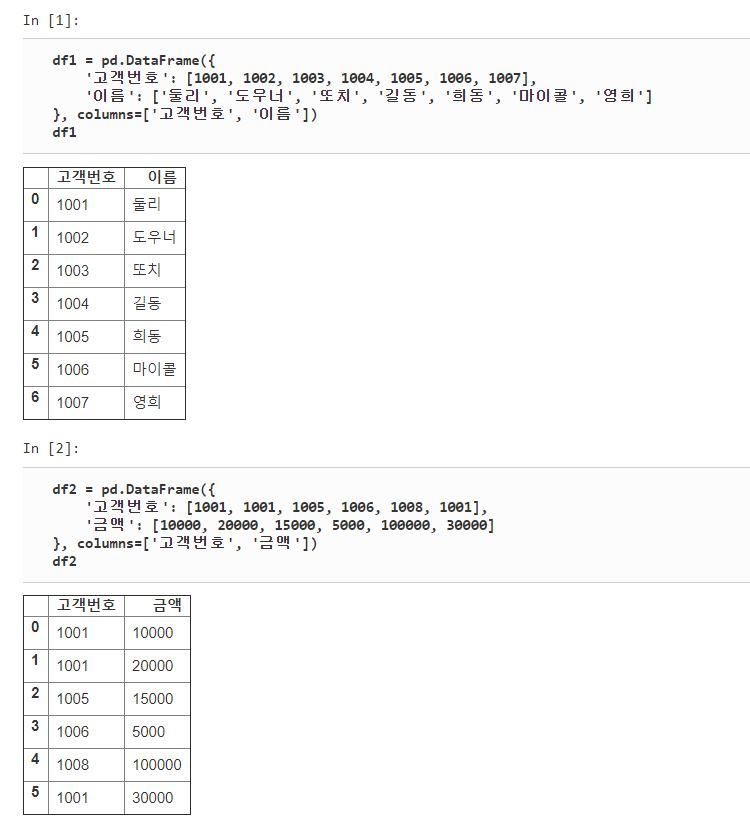

1) inner join: merge 명령으로 위의 두 데이터프레임 df1, df2 를 합치면 공통 열인 고객번호 열을 기준으로 데이터를 찾아서 합친다. 이 때 기본적으로는 양쪽 데이터프레임에 모두 키가 존재하는 데이터만 보여주는 inner join 방식을 사용한다.

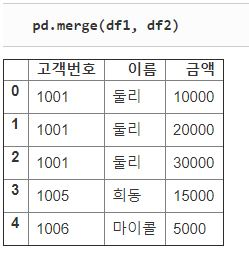

2) outer join: 키 값이 한쪽에만 있어도 데이터를 보여준다.

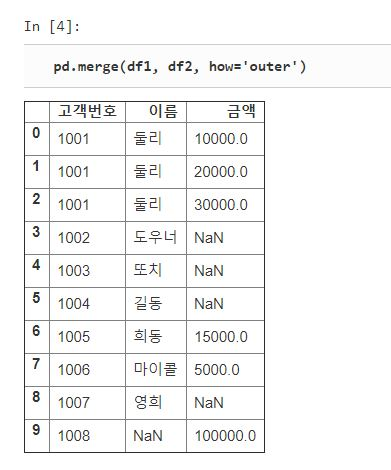

3) left, right: 각각 첫번째, 혹은 두번째 데이터프레임의 키 값을 모두 보여준다.

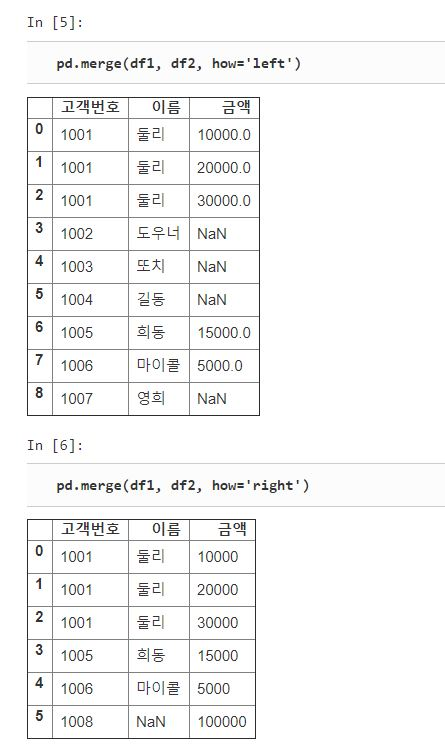

4) on 인수: 두 데이터프레임에서 이름이 같은 열은 모두 키가 된다. 만약 이름이 같아도 키가 되면 안되는 열이 있다면 on 인수로 기준열을 명시해야 한다. 


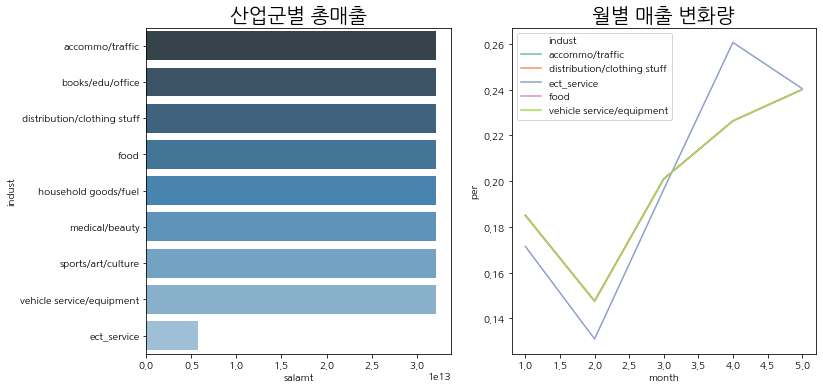

In [57]:
# 월별 매출 증감 폭을 확인하기.
# 유통/의류, 기타a서비스, 음식 순으로 유망하다고 생각할 수 있지만
# 오른쪽 그래프를 보면 코로나-19 사태이후 5월이 되어서야 기존의 1월의 매출 수준을 겨우 따라잡은 산업군들이 있다. 

s = pd.DataFrame(card.groupby(by = ['indust', 'month'])['salamt'].sum()).reset_index()
s = s[s['month'] != 6]
ss = pd.DataFrame(s.groupby('indust')['salamt'].sum()).reset_index()
ss.columns = ['indust', 'sum_salamt']
s = pd.merge(s, ss, how = 'inner', on = 'indust')
s['per'] = s['salamt']/s['sum_salamt']

plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.title('산업군별 총매출', fontsize = 20)
ax = sns.barplot(data = g, x = 'salamt', y = 'indust', palette = 'Blues_d')

plt.subplot(122)
plt.title('월별 매출 변화량', fontsize = 20)
ax = sns.lineplot(data = s[s['indust'].str.contains('dist|ect|food|veh|acc')],
                  x = 'month', y = 'per', hue=  'indust', palette = 'Set2')

plt.show()

## 코로나

In [73]:
case= pd.read_csv('C:/jupyter_project/CORONA/COVID_19/Time.csv')

###  Time 데이터 변수설명

- date: YYYY-MM-DD

- time: Time (0 = AM 12:00 / 16 = PM 04:00)

The time for KCDC to open the information has been changed from PM 04:00 to AM 12:00 since March 2nd.

- test: the accumulated number of tests

A test is a diagnosis of an infection.

- negative: the accumulated number of negative results

- confirmed: the accumulated number of positive results

- released: the accumulated number of releases

- deceased: the accumulated number of deceases

In [74]:
case= pd.read_csv('C:/jupyter_project/CORONA/COVID_19/Time.csv',usecols=['date','confirmed'])

In [75]:
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       163 non-null    object
 1   confirmed  163 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.7+ KB


In [76]:
case=case.sort_values(['date'],ascending=False)
case

,date,confirmed
162,2020-06-30,12800
161,2020-06-29,12757
160,2020-06-28,12715
159,2020-06-27,12653
158,2020-06-26,12602
...,...,...
4,2020-01-24,2
3,2020-01-23,1
2,2020-01-22,1
1,2020-01-21,1


In [77]:
case=case.reset_index()
case

,index,date,confirmed
0,162,2020-06-30,12800
1,161,2020-06-29,12757
2,160,2020-06-28,12715
3,159,2020-06-27,12653
4,158,2020-06-26,12602
...,...,...,...
158,4,2020-01-24,2
159,3,2020-01-23,1
160,2,2020-01-22,1
161,1,2020-01-21,1


In [78]:
case=case.drop(['index'],axis=1)

In [79]:
case

,date,confirmed
0,2020-06-30,12800
1,2020-06-29,12757
2,2020-06-28,12715
3,2020-06-27,12653
4,2020-06-26,12602
...,...,...
158,2020-01-24,2
159,2020-01-23,1
160,2020-01-22,1
161,2020-01-21,1


In [80]:
dict_case=[]
for i in range(len(case)-1):
    dict_case.append(case['confirmed'][i]-case['confirmed'][i+1])
dict_case.append(1)

case['daily']=dict_case
case=case.sort_values(['date'],ascending=True)
case=case.reset_index()
case=case.drop(['index'],axis=1)

In [81]:
case['daily']=dict_case
case=case.sort_values(['date'],ascending=True)
case=case.reset_index()
case=case.drop(['index'],axis=1)

In [82]:
fig=px.bar(case,x='date',y='daily')
fig.update_layout(
    title={
        'text': "확진자 추이(전국)",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

## 요약

포스트 코로나로 판단할 시점을 찾기 위해 서울의 월별 신규 확진자 수를 확인.
전국 분포를 봤을 때 언급한 바와 같이 1,2월에 비해 3월에 확진자 수가 급증하였으며
거리두기 캠페인이 종료된 이후 점차 급증함을 보였다. 

In [83]:
patientinfo=pd.read_csv('C:/jupyter_project/CORONA/COVID_19/PatientInfo.csv',usecols=['confirmed_date','province','infection_case'])
patientinfo

,province,infection_case,confirmed_date
0,서울,overseas inflow,2020-01-23
1,서울,overseas inflow,2020-01-30
2,서울,contact with patient,2020-01-30
3,서울,overseas inflow,2020-01-30
4,서울,contact with patient,2020-01-31
...,...,...,...
5160,제주도,overseas inflow,2020-05-30
5161,제주도,overseas inflow,2020-06-16
5162,제주도,overseas inflow,2020-06-18
5163,제주도,overseas inflow,2020-06-18


In [84]:
patientinfo_seoul=patientinfo[patientinfo['province']=='서울']
patientinfo_seoul['cnt']=1

In [85]:
#서울확진자수
patient_s=patientinfo_seoul.groupby(['confirmed_date','province'],as_index=False).cnt.sum()
patient_s

,confirmed_date,province,cnt
0,2020-01-23,서울,1
1,2020-01-30,서울,3
2,2020-01-31,서울,3
3,2020-02-02,서울,1
4,2020-02-05,서울,2
...,...,...,...
124,2020-06-25,서울,17
125,2020-06-26,서울,17
126,2020-06-27,서울,14
127,2020-06-28,서울,7


In [87]:
#누적
patient_s['cnt_sum']=patient_s.groupby('province')['cnt'].cumsum()
patient_s

,confirmed_date,province,cnt,cnt_sum
0,2020-01-23,서울,1,1
1,2020-01-30,서울,3,4
2,2020-01-31,서울,3,7
3,2020-02-02,서울,1,8
4,2020-02-05,서울,2,10
...,...,...,...,...
124,2020-06-25,서울,17,1267
125,2020-06-26,서울,17,1284
126,2020-06-27,서울,14,1298
127,2020-06-28,서울,7,1305


In [88]:
patient_s['confirmed_date']=pd.to_datetime(patient_s['confirmed_date'])
patient_s['주차']=patient_s['confirmed_date'].dt.weekofyear
patient_s['월']=patient_s['confirmed_date'].dt.month

In [90]:
fig=px.bar(patient_s,x='confirmed_date',y='cnt')
fig.update_layout(
    title={
        'text': "지역별 확진자 변화(서울 한정)-달 초/말 로 나눔",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

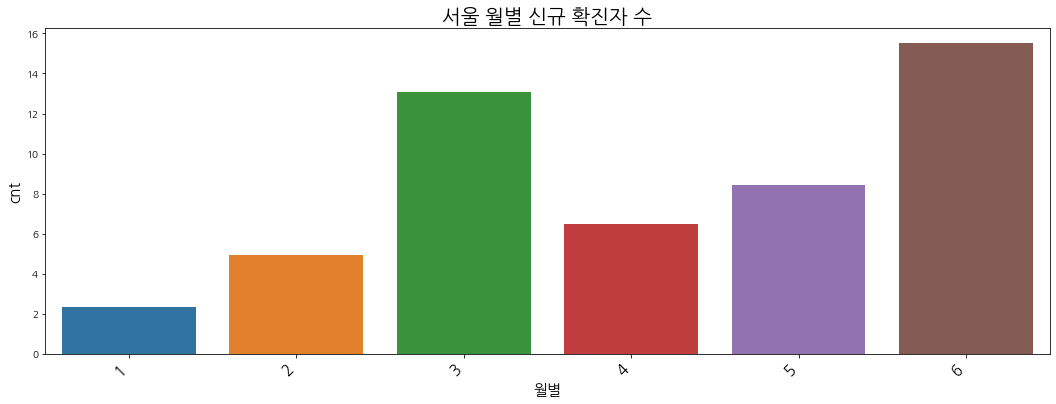

In [91]:
plt.figure(figsize=(18, 6))
pal = sns.color_palette("Blues_d", patient_s.shape[0])
sns.barplot(data=patient_s, x='월', y='cnt',ci=None)

plt.title(f'서울 월별 신규 확진자 수', size=20)
plt.xticks(rotation=45, size=15, ha='right')
plt.xlabel('월별', size=15)
plt.ylabel('cnt', size=15)
plt.show()

## 요약

확진자 수가 급증한 시점은 9주차로 볼 수 있다.
구체적인 일자는 일별 확진자수를 비교하여 결정하였으며,
그 결과 20년도 3월 10일까지는 코로나 이전의 시대, 3월 11일부터는 포스트 코로나 시대로 분류하였다.

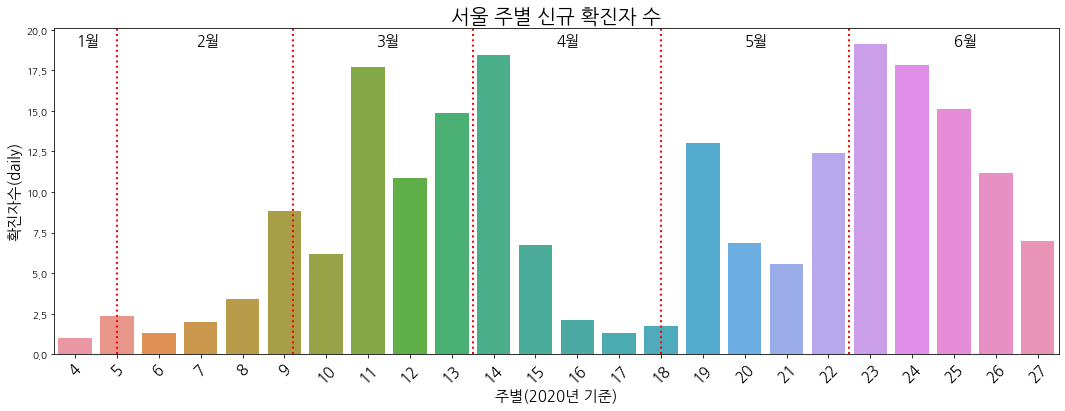

In [92]:
plt.figure(figsize=(18, 6))
sns.barplot(x='주차', y='cnt',data=patient_s,dodge=False,ci=None)

plt.title(f'서울 주별 신규 확진자 수', size=20)
plt.xticks(rotation=45, size=15)
plt.xlabel('주별(2020년 기준)', size=15)
plt.ylabel('확진자수(daily)', size=15)
plt.axvline(x=1, color='r', linestyle=':', linewidth=2)
plt.axvline(x=5.2, color='r', linestyle=':', linewidth=2)
plt.axvline(x=9.5, color='r', linestyle=':', linewidth=2)
plt.axvline(x=14, color='r', linestyle=':', linewidth=2)
plt.axvline(x=18.5, color='r', linestyle=':', linewidth=2)
plt.text(0.04, 19, r'1월',size=15)
plt.text(2.9, 19, r'2월',size=15)
plt.text(7.2, 19, r'3월',size=15)
plt.text(11.5, 19, r'4월',size=15)
plt.text(16, 19, r'5월',size=15)
plt.text(21, 19, r'6월',size=15)

plt.show()

## 군집분석

### reset_index 

인덱스를 보통의 자료열로 바꿀 수도 있다. 이 때 인덱스 열은 자료열의 가장 선두로 삽입된다. 데이터프레임의 인덱스는 정수로 된 디폴트 인덱스로 바뀐다.


reset_index 명령 사용시에 drop=True 로 설정하면 인덱스 열을 보통의 자료열로 올리는 것이 아니라 그냥 버리게 된다.

In [68]:
card_01 = card[card['month'] == 1].reset_index(drop = True)
card_02 = card[card['month'] == 2].reset_index(drop = True)
card_03 = card[card['month'] == 3].reset_index(drop = True)
card_04 = card[card['month'] == 4].reset_index(drop = True)
card_05 = card[card['month'] == 5].reset_index(drop = True)
card_06 = card[card['month'] == 6].reset_index(drop = True)

In [94]:
# 월별, 가맹점 업종별 매출발생금액을 확인하기 위해 데이터를 처리한다. 

amt_01 = pd.DataFrame(card_01.groupby(by = ['mrhst_induty_cl_nm'])['salamt'].sum()).reset_index()
amt_01.columns = ['cl_nm', '1월 매출']
amt_02 = pd.DataFrame(card_02.groupby(by = ['mrhst_induty_cl_nm'])['salamt'].sum()).reset_index()
amt_02.columns = ['cl_nm', '2월 매출']
amt_03 = pd.DataFrame(card_03.groupby(by = ['mrhst_induty_cl_nm'])['salamt'].sum()).reset_index()
amt_03.columns = ['cl_nm', '3월 매출']
amt_04 = pd.DataFrame(card_04.groupby(by = ['mrhst_induty_cl_nm'])['salamt'].sum()).reset_index()
amt_04.columns = ['cl_nm', '4월 매출']
amt_05 = pd.DataFrame(card_05.groupby(by = ['mrhst_induty_cl_nm'])['salamt'].sum()).reset_index()
amt_05.columns = ['cl_nm', '5월 매출']
amt_06 = pd.DataFrame(card_06.groupby(by = ['mrhst_induty_cl_nm'])['salamt'].sum()).reset_index()
amt_06.columns = ['cl_nm', '6월 매출']
amt_06

,cl_nm,6월 매출
0,1급 호텔,3615208480
1,2급 호텔,5274087736
2,CATV,279388170
3,CATV홈쇼핑,164023975912
4,L P G,11468253872
...,...,...
250,화 랑,1913023680
251,화 원,15094357392
252,화 장 품,95324343216
253,화물 운송,17466134085


In [93]:
card_amt = pd.merge(amt_01, amt_02, how = 'inner', on = ['cl_nm'])
card_amt = pd.merge(card_amt, amt_03, how = 'inner', on = ['cl_nm'])
card_amt = pd.merge(card_amt, amt_04, how = 'inner', on = ['cl_nm'])
card_amt = pd.merge(card_amt, amt_05, how = 'inner', on = ['cl_nm'])
card_amt = pd.merge(card_amt, amt_06, how = 'inner', on = ['cl_nm'])
card_amt.index = card_amt['cl_nm']
card_amt.drop('cl_nm', axis = 1, inplace= True)
card_amt

,1월 매출,2월 매출,3월 매출,4월 매출,5월 매출,6월 매출
cl_nm,,,,,,
1급 호텔,7680662744,11359201280,6140216784,6591498688,9138489896,3615208480
2급 호텔,7909795680,10373864184,7150514520,7169358584,10433746856,5274087736
CATV,106233660,1219132656,1312781904,1811780937,1429852122,279388170
CATV홈쇼핑,173369872368,223672362296,399575175288,346695345312,345928748696,164023975912
L P G,9082251792,20057305016,26596327896,25438062464,23755378992,11468253872
...,...,...,...,...,...,...
화 랑,1022772160,1576380480,1973491456,2330688440,3207949552,1913023680
화 원,19689770960,24367018536,35664017960,42405138312,58643467072,15094357392
화 장 품,211479544984,167376607624,199483728280,209869979800,216609198760,95324343216


In [71]:
# 군집화를 하기 전에 1월부터 5월까지 매출의 scaling 한다. 

card_amt_05 = card_amt.iloc[:,:5]
card_amt_05['sum']  = card_amt_05.sum(axis = 1)
card_amt_05 = card_amt_05.sort_values(by = ('sum'),ascending = False)
card_amt_perc = card_amt_05.iloc[:, :5].div(card_amt_05['sum'], axis = 0)*100

In [96]:
card_amt_05

,1월 매출,2월 매출,3월 매출,4월 매출,5월 매출,sum
cl_nm,,,,,,
인터넷P/G,11873027824368,9924606619752,12112603651992,11988139918648,12104979863792,58003357878552
인터넷Mall,4111319350912,880453484296,2768058679616,4875415491872,7051307356744,19686554363440
조세서비스(특약),3072049664553,1902837312945,2876657991381,5508990976374,4850645609124,18211181554377
일반한식,2609940470912,1819884529456,2190426488928,2401356986848,2674916998816,11696525474960
손해 보험,1385776559824,1662774502760,2413114903616,2417412914992,2413539840296,10292618721488
...,...,...,...,...,...,...
교육테이프,1246400,5078400,117536000,116159680,61648800,301669280
기타회원제형태업소2,13095000,37444500,38331000,106695000,100224000,295789500
전기차충전소,12362760,15237712,20052784,22928816,22140088,92722160


In [97]:
card_amt_perc

,1월 매출,2월 매출,3월 매출,4월 매출,5월 매출
cl_nm,,,,,
인터넷P/G,20.469553,17.110400,20.882590,20.668010,20.869447
인터넷Mall,20.883895,4.472360,14.060656,24.765205,35.817885
조세서비스(특약),16.869030,10.448731,15.796108,30.250596,26.635535
일반한식,22.313810,15.559189,18.727155,20.530516,22.869330
손해 보험,13.463790,16.155019,23.445101,23.486860,23.449230
...,...,...,...,...,...
교육테이프,0.413168,1.683433,38.961872,38.505638,20.435889
기타회원제형태업소2,4.427135,12.659171,12.958878,36.071260,33.883556
전기차충전소,13.333123,16.433733,21.626744,24.728518,23.877882


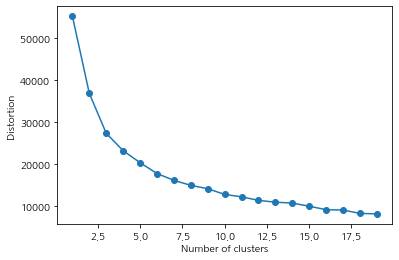

In [95]:
# KMeans clustering을 하기 전에 적절한 K를 찾아봅니다.

from sklearn.cluster import KMeans
distortions = []
for i in range(1, 20):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(card_amt_perc)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [98]:
corr=card.corr()
corr

,adstrd_code,mrhst_induty_cl_code,selng_cascnt,salamt,year,month,day
adstrd_code,1.000000,0.004113,0.000480,0.002959,NaN,-0.002323,-0.001021
mrhst_induty_cl_code,0.004113,1.000000,-0.003337,-0.002142,NaN,-0.014536,-0.001811
selng_cascnt,0.000480,-0.003337,1.000000,0.205127,NaN,-0.002442,0.000025
salamt,0.002959,-0.002142,0.205127,1.000000,NaN,-0.001912,0.001175
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,-0.002323,-0.014536,-0.002442,-0.001912,NaN,1.000000,-0.276353
day,-0.001021,-0.001811,0.000025,0.001175,NaN,-0.276353,1.000000


### 유동인구 데이터 변수

tmzon_se_code: 24시간대 구분코드

sexdstn_se_code: 성별 구분코드 (M: 남성, F: 여성)

agrde_se_code: 5세단위 연령대구분코드 (단, age_00: 0세 ~ 9세, age_70: 70세 이상)

popltn_cascnt: 인구수

In [99]:
move=pd.read_csv('C:/jupyter_project/CORONA/fpopl.csv',dtype={'CODE':np.str})

In [100]:
move.head()

,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt
0,20200101,0,M,age_00,11650560,15
1,20200101,0,M,age_00,11590620,6
2,20200101,0,M,age_00,11560710,4
3,20200101,0,M,age_00,11470680,12
4,20200101,0,M,age_00,11350665,6


In [101]:
move.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47546443 entries, 0 to 47546442
Data columns (total 6 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   base_ymd         int64 
 1   tmzon_se_code    int64 
 2   sexdstn_se_code  object
 3   agrde_se_code    object
 4   adstrd_code      int64 
 5   popltn_cascnt    int64 
dtypes: int64(4), object(2)
memory usage: 2.1+ GB


In [102]:
move['receipt_dttm'] = move['base_ymd'].astype(str)
move['receipt_dttm'] = pd.to_datetime(move['receipt_dttm'])
move['receipt_dttm'] = move['receipt_dttm'].dt.tz_localize('UTC')
print(move['receipt_dttm'])

0          2020-01-01 00:00:00+00:00
1          2020-01-01 00:00:00+00:00
2          2020-01-01 00:00:00+00:00
3          2020-01-01 00:00:00+00:00
4          2020-01-01 00:00:00+00:00
                      ...           
47546438   2020-06-16 00:00:00+00:00
47546439   2020-06-16 00:00:00+00:00
47546440   2020-06-16 00:00:00+00:00
47546441   2020-06-16 00:00:00+00:00
47546442   2020-06-16 00:00:00+00:00
Name: receipt_dttm, Length: 47546443, dtype: datetime64[ns, UTC]


In [103]:
move["month"] = move['receipt_dttm'].dt.month
move["day"] = move['receipt_dttm'].dt.day
move['weekday'] = move['receipt_dttm'].dt.weekday

In [104]:
move.head()

,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt,receipt_dttm,month,day,weekday
0,20200101,0,M,age_00,11650560,15,2020-01-01 00:00:00+00:00,1,1,2
1,20200101,0,M,age_00,11590620,6,2020-01-01 00:00:00+00:00,1,1,2
2,20200101,0,M,age_00,11560710,4,2020-01-01 00:00:00+00:00,1,1,2
3,20200101,0,M,age_00,11470680,12,2020-01-01 00:00:00+00:00,1,1,2
4,20200101,0,M,age_00,11350665,6,2020-01-01 00:00:00+00:00,1,1,2


In [105]:
move= move.sort_values(by=['receipt_dttm'])

In [106]:
move=pd.merge(move, local, on='adstrd_code')

In [107]:
move.head()

,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt,receipt_dttm,month,day,weekday,adstrd_nm,brtc_nm,signgu_nm
0,20200101,0,M,age_00,11650560,15,2020-01-01 00:00:00+00:00,1,1,2,반포1동,서울특별시,서초구
1,20200101,16,F,age_00,11650560,54,2020-01-01 00:00:00+00:00,1,1,2,반포1동,서울특별시,서초구
2,20200101,16,M,age_00,11650560,24,2020-01-01 00:00:00+00:00,1,1,2,반포1동,서울특별시,서초구
3,20200101,16,M,age_10,11650560,150,2020-01-01 00:00:00+00:00,1,1,2,반포1동,서울특별시,서초구
4,20200101,16,F,age_10,11650560,171,2020-01-01 00:00:00+00:00,1,1,2,반포1동,서울특별시,서초구


In [108]:
move = move.drop('base_ymd',axis=1)

In [109]:
move = move.drop('brtc_nm',axis=1)

In [110]:
move = move.set_index("receipt_dttm")
move

,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt,month,day,weekday,adstrd_nm,signgu_nm
receipt_dttm,,,,,,,,,,
2020-01-01 00:00:00+00:00,0,M,age_00,11650560,15,1,1,2,반포1동,서초구
2020-01-01 00:00:00+00:00,16,F,age_00,11650560,54,1,1,2,반포1동,서초구
2020-01-01 00:00:00+00:00,16,M,age_00,11650560,24,1,1,2,반포1동,서초구
2020-01-01 00:00:00+00:00,16,M,age_10,11650560,150,1,1,2,반포1동,서초구
2020-01-01 00:00:00+00:00,16,F,age_10,11650560,171,1,1,2,반포1동,서초구
...,...,...,...,...,...,...,...,...,...,...
2020-06-16 00:00:00+00:00,8,M,age_00,11530800,7,6,16,1,항동,구로구
2020-06-16 00:00:00+00:00,8,F,age_00,11530800,12,6,16,1,항동,구로구
2020-06-16 00:00:00+00:00,8,F,age_10,11530800,18,6,16,1,항동,구로구


In [111]:
move.head()

,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt,month,day,weekday,adstrd_nm,signgu_nm
receipt_dttm,,,,,,,,,,
2020-01-01 00:00:00+00:00,0,M,age_00,11650560,15,1,1,2,반포1동,서초구
2020-01-01 00:00:00+00:00,16,F,age_00,11650560,54,1,1,2,반포1동,서초구
2020-01-01 00:00:00+00:00,16,M,age_00,11650560,24,1,1,2,반포1동,서초구
2020-01-01 00:00:00+00:00,16,M,age_10,11650560,150,1,1,2,반포1동,서초구
2020-01-01 00:00:00+00:00,16,F,age_10,11650560,171,1,1,2,반포1동,서초구


In [112]:
total = move.isnull().sum()
percent = (move.isnull().sum() / move.isnull().count()*100)

In [113]:
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).sort_values(by='Percent', ascending=False).head(30)

,Total,Percent
tmzon_se_code,0,0.0
sexdstn_se_code,0,0.0
agrde_se_code,0,0.0
adstrd_code,0,0.0
popltn_cascnt,0,0.0
month,0,0.0
day,0,0.0
weekday,0,0.0
adstrd_nm,0,0.0
signgu_nm,0,0.0


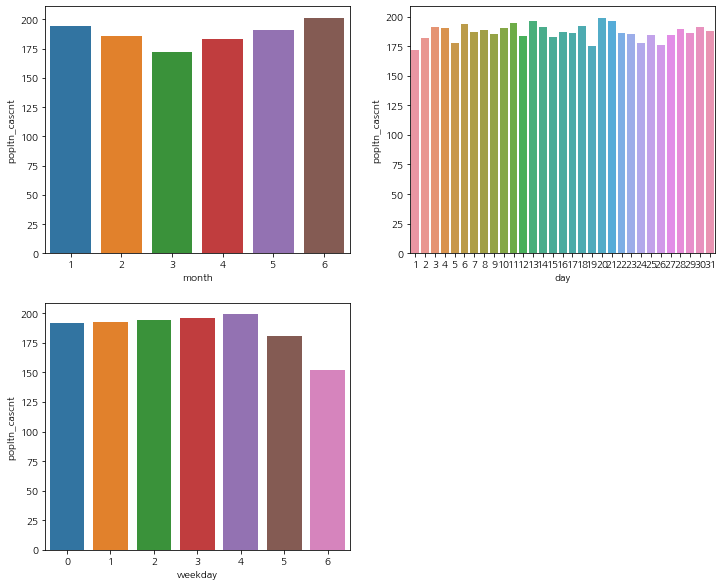

In [114]:
#month와 유동인구
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='month',y='popltn_cascnt',data=move.groupby('month')['popltn_cascnt'].mean().reset_index())

#일별와 유동인구
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='day',y='popltn_cascnt',data=move.groupby('day')['popltn_cascnt'].mean().reset_index())

#휴일별와 유동인구
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='weekday',y='popltn_cascnt',data=move.groupby('weekday')['popltn_cascnt'].mean().reset_index())


In [115]:
print('tmzon_se_code', move['tmzon_se_code'].unique())
print('sexdstn_se_code', move['sexdstn_se_code'].unique())
print('agrde_se_code', move['agrde_se_code'].unique())
print('weekday', move['weekday'].unique())

tmzon_se_code [ 0 16 15 17 18 13 12 14 21 22 23 19 20  4  3  5  6  1  2 10  9 11  7  8]
sexdstn_se_code ['M' 'F']
agrde_se_code ['age_00' 'age_10' 'age_60' 'age_65' 'age_70' 'age_30' 'age_35' 'age_40'
 'age_20' 'age_15' 'age_25' 'age_50' 'age_45' 'age_55']
weekday [2 3 4 5 6 0 1]


In [116]:
move['weekday']= move.weekday.astype('category')

In [117]:
print(move['weekday'].cat.categories)

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')


In [118]:
move.weekday.cat.categories = ['1','2','3','4','5','6','7']

In [119]:
move['sexdstn_se_code'].replace(['M','F'],[0,1],inplace=True)

In [120]:
move['agrde_se_code']= move.agrde_se_code.astype('category')

In [121]:
print(move['agrde_se_code'].cat.categories)

Index(['age_00', 'age_10', 'age_15', 'age_20', 'age_25', 'age_30', 'age_35',
       'age_40', 'age_45', 'age_50', 'age_55', 'age_60', 'age_65', 'age_70'],
      dtype='object')


In [122]:
move.agrde_se_code.cat.categories = ['00','10','15','20','25','30','35','40','45','50','55','60','65','70']

In [123]:
move.head()

,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt,month,day,weekday,adstrd_nm,signgu_nm
receipt_dttm,,,,,,,,,,
2020-01-01 00:00:00+00:00,0,0,00,11650560,15,1,1,3,반포1동,서초구
2020-01-01 00:00:00+00:00,16,1,00,11650560,54,1,1,3,반포1동,서초구
2020-01-01 00:00:00+00:00,16,0,00,11650560,24,1,1,3,반포1동,서초구
2020-01-01 00:00:00+00:00,16,0,10,11650560,150,1,1,3,반포1동,서초구
2020-01-01 00:00:00+00:00,16,1,10,11650560,171,1,1,3,반포1동,서초구


In [124]:
movpop = pd.DataFrame(move.groupby(by = ('receipt_dttm'))['popltn_cascnt'].sum())
movpop.reset_index(inplace = True)

In [125]:
movpop.head()

,receipt_dttm,popltn_cascnt
0,2020-01-01 00:00:00+00:00,45208028
1,2020-01-02 00:00:00+00:00,55749874
2,2020-01-03 00:00:00+00:00,59151121
3,2020-01-04 00:00:00+00:00,54474173
4,2020-01-05 00:00:00+00:00,46903976


No handles with labels found to put in legend.


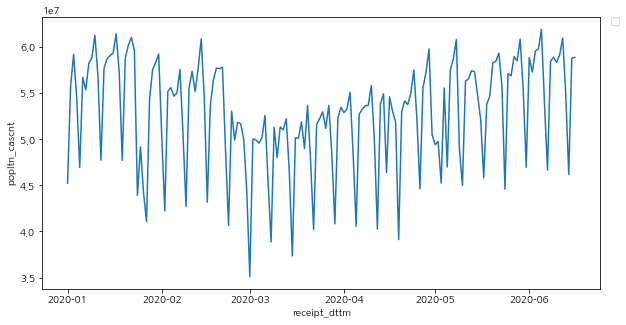

In [126]:
# 코로나 19 발병 이후 유동인구가 감소하다가 3월을 기점으로 점차 유동인구가 증가하고 있는 것을 볼 수 있다. 

plt.figure(figsize=(10,5))
sns.lineplot(data=movpop,x="receipt_dttm",y="popltn_cascnt")
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.)

## 배달 데이터

### 변수

1. SERIAL_NUMBER: 순번
    
2. PROCESS_DT: 처리 일시

3. DLVR_RQESTER_ID: 배달요청업체 ID

4. DLVR_REQUST_STTUS_VALUE: 배달요청상태값 (1:완료, 2:취소, 3:사고, 4:문의)

5. DLVR_STORE_INDUTY_NM: 배달상점 업종이름
    
6. DLVR_RCEPT_CMPNY_ID: 배달접수회사 ID
    
7. DLVR_STORE_ID: 배달상점ID
    
8. DLVR_STORE_INDUTY_NM: 배달상점 업종이름
    
9. DLVR_STORE_LEGALDONG_CODE: 배달상점 주소 법정동코드

10. GOODS_AMOUNT: 배달상품금액
    
11. SETLE_KND_VALUE: 결제종류번호 (1:카드, 2:선불, 3:현금)

In [ ]:
delivery=pd.read_csv('C:/jupyter_project/CORONA/delivery.csv',dtype={'CODE':np.str})
delivery = delivery[delivery['DLVR_REQUST_STTUS_VALUE'] == 1] #배달이 완료된 행만 추출
delivery.reset_index(drop = True, inplace = True)
delivery_columns = ['PROCESS_DT', 'DLVR_STORE_INDUTY_NM', 'DLVR_STORE_SIDO', 'GOODS_AMOUNT', 'SETLE_KND_VALUE']
delivery_need = delivery[delivery_columns]

In [ ]:
delivery.head()

In [ ]:
# 주문 비용이나 주문수량이 많은 경우 이상치로 제거

def outlier_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((data > upper_bound) | (data < lower_bound))

In [ ]:
delivery_outlier_index = outlier_iqr(delivery_need['GOODS_AMOUNT'])[0]
delivery_not_outlier_index = []
for i in delivery_need.index:
    if i not in delivery_outlier_index:
        delivery_not_outlier_index.append(i)
delivery_clean = delivery_need.loc[delivery_not_outlier_index]
delivery_clean.reset_index(drop = True, inplace= True)